In [3]:
## Importing all required packages
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing dataset

leaddf = pd.read_csv('Leads.csv', encoding = 'latin')
leaddf.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
## inspect leadInfo dataframe
leaddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# inspect leadInfo dataframe
leaddf.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# inspect leadInfo dataframe
leaddf.shape

(9240, 37)

#### Data Cleaning

In [8]:
## checking the null values

leaddf.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# check for percentage of null values in each column

percent_missing = round(100*(leaddf.isnull().sum()/len(leaddf.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

- There are some columns that have more than 30% null values.
- we will drop those columns which are greater than 30%

In [10]:
# Check if there are any duplicate values in the dataset

leaddf[leaddf.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


There are no duplicate values in the data.

In [11]:
# Following columns have a value called select. Convert those values as nan since the customer has not selected any options for 
# these columns while entering the data.

### a) Specialization
### b) How did you hear about X Education
### c) Lead Profile
### d) City

### Converting 'Select' values to NaN.

leaddf['Specialization'] = leaddf['Specialization'].replace('Select', np.nan)
leaddf['How did you hear about X Education'] = leaddf['How did you hear about X Education'].replace('Select', np.nan)
leaddf['Lead Profile'] = leaddf['Lead Profile'].replace('Select', np.nan)
leaddf['City'] = leaddf['City'].replace('Select', np.nan)

In [12]:

# check for percentage of null values in each column

percent_missing = round(100*(leaddf.isnull().sum()/len(leaddf.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [13]:
# Let us drop the following columns that have more than 30% null values

# a) Specialization
# b) How did you hear about X Education
# c) Tags
# d) Lead Quality
# e) Lead Profile
# f) City
# g) Asymmetrique Activity Index
# h) Asymmetrique Profile Index
# i) Asymmetrique Activity Score
# j) Asymmetrique Profile Score

leaddf = leaddf.drop(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality',
                          'Lead Profile','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                          'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [14]:
### re-checking the percentage
percent_missing = round(100*(leaddf.isnull().sum()/len(leaddf.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

Following columns have null values :

- Lead Source
- Total Visits
- Page Views Per Visit
- Last Activity
- Country    
- What is your current occupation
- What matters most to you in choosing a course

Let us see and decide whather we need to impute values in the above column or drop the columns.

In [15]:
# Check the value counts for the column Lead Source

leaddf['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [16]:
# From the above it can be noticed that Google appears twice with different cases. Hence we shall convert all rows with value 
# "Google" to the same case.
# Also since "Google" has the major chunk of data, we can impute the null values with Google

leaddf['Lead Source'] = leaddf['Lead Source'].replace('google', 'Google')
leaddf['Lead Source'] = leaddf['Lead Source'].replace(np.nan, 'Google')

In [17]:
# Check the value counts for the column Total Visits

leaddf['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [18]:
# Check the median of column 

leaddf['TotalVisits'].median()

3.0

In [19]:
# We shall impute the null values in TotalVisits by the median value which is 3.0

leaddf['TotalVisits'] = leaddf['TotalVisits'].replace(np.nan, leaddf['TotalVisits'].median())

In [20]:
# Check the value counts for Page Views Per Visit

leaddf['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [21]:
# Check the median of the column

leaddf['Page Views Per Visit'].median()

2.0

In [22]:
# We shall impute the null values in 'Page Views Per Visit' by the median value which is 2.0

leaddf['Page Views Per Visit'] = leaddf['Page Views Per Visit'].replace(np.nan, leaddf['Page Views Per Visit'].median())

In [23]:
# Check the value counts for the column Last Activity

leaddf['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [24]:
# Since we do not have any information of what the last activity of the customer would have been, we can add a new category 
# called 'Not Sure' for the null values

leaddf['Last Activity'] = leaddf['Last Activity'].replace(np.nan, 'Not Sure')

In [25]:
# Lets check the value counts for each values in the country column

leaddf.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [26]:
# check the percentage of India as value in the country column

country_percentage = round(100*len(leaddf[leaddf['Country'] == 'India'])/len(leaddf['Country']),2)
print(country_percentage)

70.26


In [27]:
# Since "India" occurs around 70% of times in the Country column, and country column also has around 27% as missing values, 
# we shall go ahead and drop the column

leaddf = leaddf.drop(['Country'], axis=1)

In [28]:
# Check the value counts for the column "What is your current Occupation"

leaddf['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [29]:
# Since no information has been provided Current Occupation, we can add a new category called No Information and set that 
# as value for the null columns

leaddf['What is your current occupation'] = leaddf['What is your current occupation'].replace(np.nan, 'No Information')

In [30]:
# Check the value counts for the column What matters most to you in choosing a course 

leaddf['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [31]:
matters_most_percentage = round(100*len(leaddf[leaddf['What matters most to you in choosing a course'] 
                            == 'Better Career Prospects'])/len(leaddf['What matters most to you in choosing a course']),2)
print(matters_most_percentage)

70.65


In [32]:
# Since Better Career Prospects occurs around 70% of times in the What matters most to you in choosing a course column, and
# since the column also has around 29% as missing values, we shall go ahead and drop the column

leaddf = leaddf.drop(['What matters most to you in choosing a course'], axis=1)

In [33]:

# check for percentage of null values in each column

percent_missing = round(100*(leaddf.isnull().sum()/len(leaddf.index)), 2)
print(percent_missing)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

All the null values in the columns now have either been imputed or we have dropped the columns which have more than 70% data concentrated towards one value

In [34]:
leaddf.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [35]:
leaddf.Magazine.unique()

array(['No'], dtype=object)

In [36]:
leaddf['Receive More Updates About Our Courses'].unique()

array(['No'], dtype=object)

In [37]:
leaddf['Update me on Supply Chain Content'].unique()

array(['No'], dtype=object)

In [38]:
leaddf['Get updates on DM Content'].unique()

array(['No'], dtype=object)

In [39]:
leaddf['I agree to pay the amount through cheque'].unique()

array(['No'], dtype=object)

In [40]:
# Since the following columns have only one value "No" in all the rows, we can eliminate the columns :

# a) Magazine
# b) Receive More Updates About Our Courses
# c) Update me on Supply Chain Content
# d) Get updates on DM Content
# e) I agree to pay the amount through cheque

leaddf = leaddf.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [41]:
leaddf.shape

(9240, 20)

#### Outlier Treatment

In [42]:
# Checking outliers at 25%,50%,75%,90%,95% and above
leaddf.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


From the above, it can be seen that outlier exists in the columns TotalVisits and Page Views Per Visit columns.

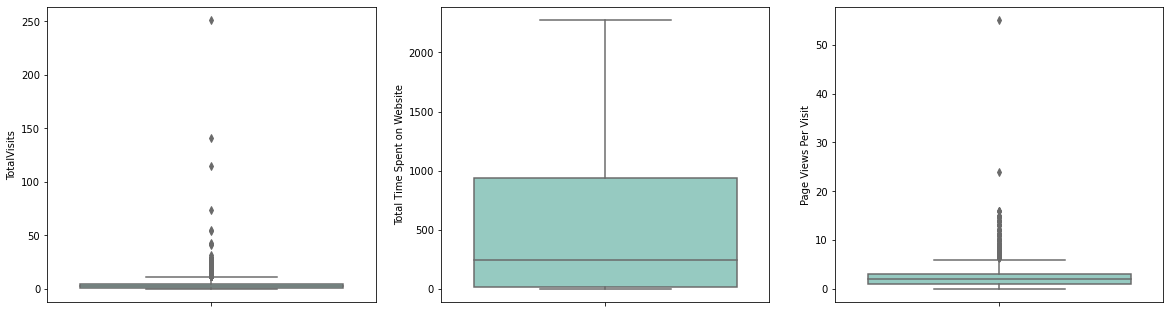

In [43]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set3', data = leaddf)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set3', data = leaddf)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = leaddf)
plt.show()

In [44]:

# Removing values beyond 99% for Total Visits

nn_quartile_total_visits = leaddf['TotalVisits'].quantile(0.99)
leaddf = leaddf[leaddf["TotalVisits"] < nn_quartile_total_visits]
leaddf["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [45]:
# Checking outliers at 25%,50%,75%,90%,95% and above

leaddf.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9141.00000,9141.000000,9141.000000,9141.000000,9141.000000
mean,617233.45192,0.385406,3.179740,486.074609,2.329506
std,23413.72193,0.486718,2.913631,547.856302,2.046673
min,579533.00000,0.000000,0.000000,0.000000,0.000000
25%,596519.00000,0.000000,1.000000,10.000000,1.000000
50%,615563.00000,0.000000,3.000000,247.000000,2.000000
75%,637414.00000,1.000000,5.000000,933.000000,3.000000
90%,650514.00000,1.000000,7.000000,1379.000000,5.000000
95%,655406.00000,1.000000,9.000000,1561.000000,6.000000
99%,659592.80000,1.000000,13.000000,1839.600000,9.000000


In [46]:
# Removing values beyond 99% for page Views Per Visit

nn_quartile_page_visits = leaddf['Page Views Per Visit'].quantile(0.99)
leaddf = leaddf[leaddf["Page Views Per Visit"] < nn_quartile_page_visits]
leaddf["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [47]:
# Checking outliers at 25%,50%,75%,90%,95% and above
leaddf.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000
mean,617223.248422,0.385092,3.087164,483.133016,2.226383
std,23372.383121,0.486644,2.801244,547.420675,1.823395
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596530.000000,0.000000,1.000000,7.000000,1.000000
50%,615645.000000,0.000000,3.000000,245.000000,2.000000
75%,637360.000000,1.000000,4.000000,929.000000,3.000000
90%,650463.200000,1.000000,7.000000,1378.000000,5.000000
95%,655351.600000,1.000000,8.000000,1558.000000,6.000000
99%,659577.800000,1.000000,13.000000,1839.720000,7.000000


In [48]:
# Determine the percentage of data retained

num_data = round(100*(len(leaddf)/9240),2)
print(num_data)

97.72


At this point, the data has been cleaned and around 98% of data has been retained

#### Data Analysis

Let us try and understand the data now based on each columns effect on the conversion rates

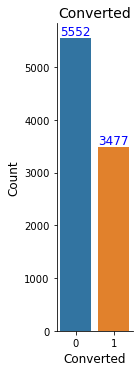

In [49]:
# Conversion Rate 

plot = sns.catplot(x="Converted", kind="count", data=leaddf, aspect= 0.4);

plt.title('Converted', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

From the above graph, there has been a overall conversion rate of around 39%

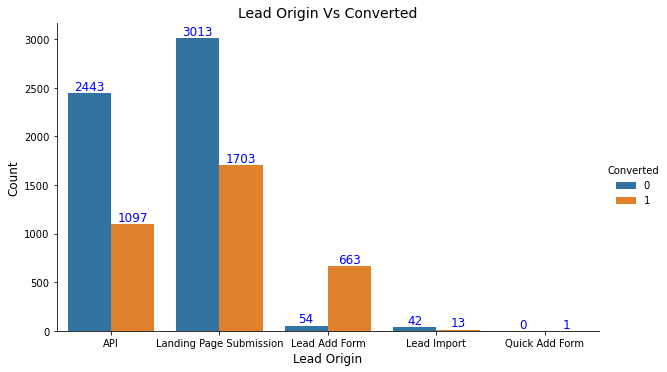

In [50]:
# Lead Origin

plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=leaddf, aspect= 1.7);

plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

From the above graph, it can be seen that the maximum conversion happened from Landing Page Submission Also there was only one request from quick add form which got converted.

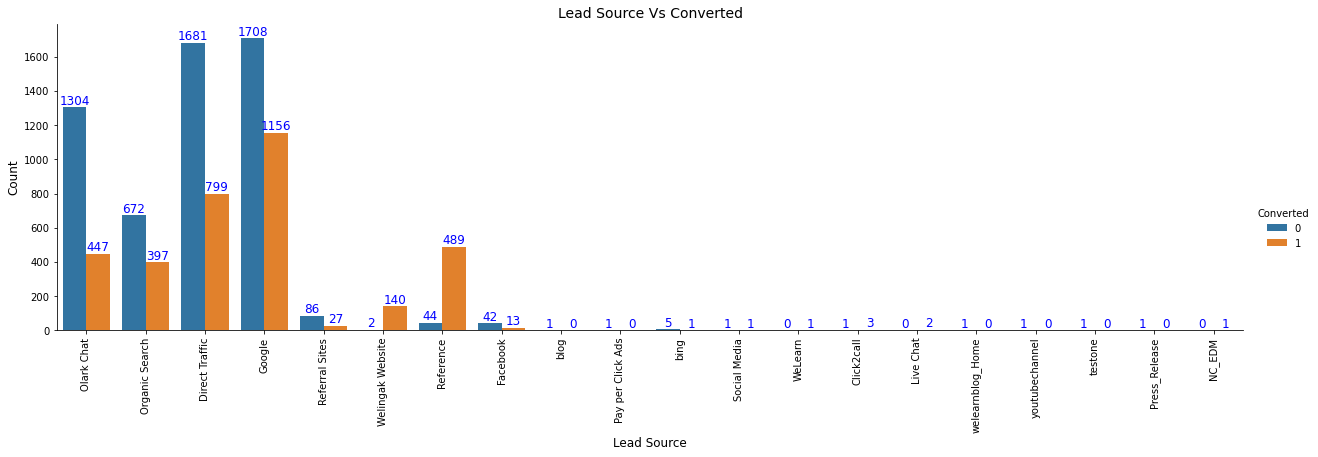

In [51]:
# Lead Source

plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=leaddf, aspect = 3.5);

plt.title('Lead Source Vs Converted', fontsize = 14)
plt.xlabel("Lead Source", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
   
plt.show()

From the above graph, it can be seen that major conversion in the lead source is from google

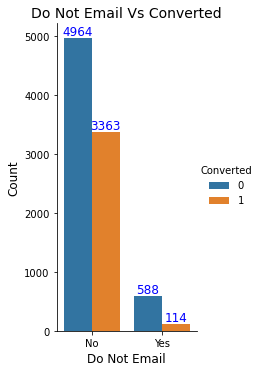

In [52]:
# Do not Email

plot = sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=leaddf, aspect = 0.6);

plt.title('Do Not Email Vs Converted', fontsize = 14)
plt.xlabel("Do Not Email", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Based on the above graph, major conversion has happend from the emails that have been sent

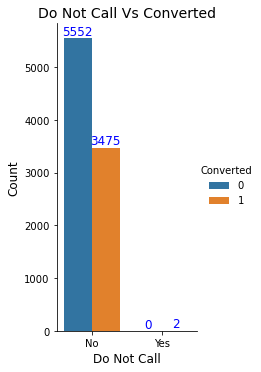

In [53]:
# Do not Call

plot = sns.catplot(x="Do Not Call", hue = "Converted", kind="count", data=leaddf, aspect = 0.6);

plt.title('Do Not Call Vs Converted', fontsize = 14)
plt.xlabel("Do Not Call", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

From the above graph , it can be noticed that major conversions happened when calls were made. However, it can also be seen that 2 leads opted for "Do Not Call", but they still got converted.

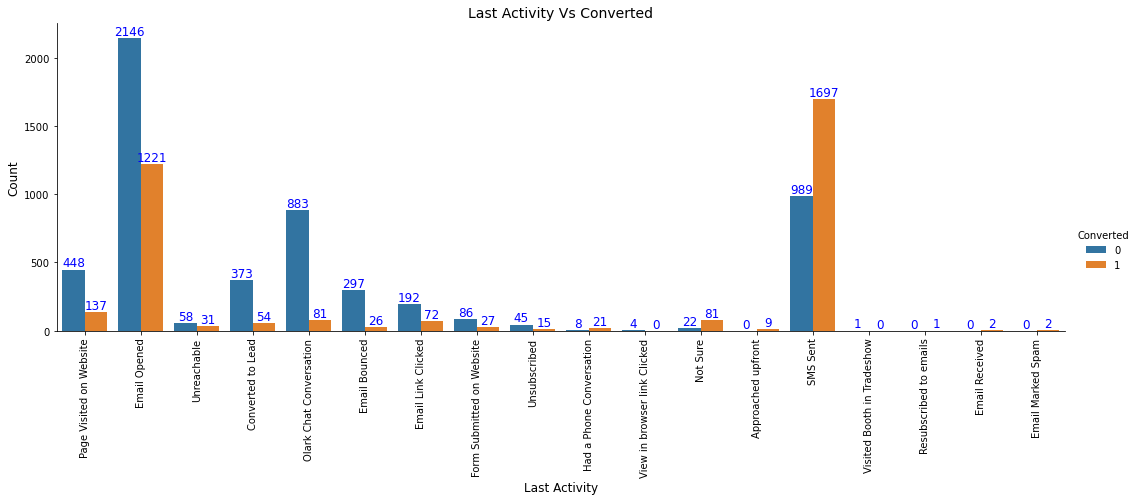

In [54]:

# Last Activity

plot = sns.catplot(x="Last Activity", hue = "Converted", kind="count", data=leaddf, aspect = 3.0);

plt.title('Last Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

As per the above graph, last activity value of 'SMS Sent' had more conversion

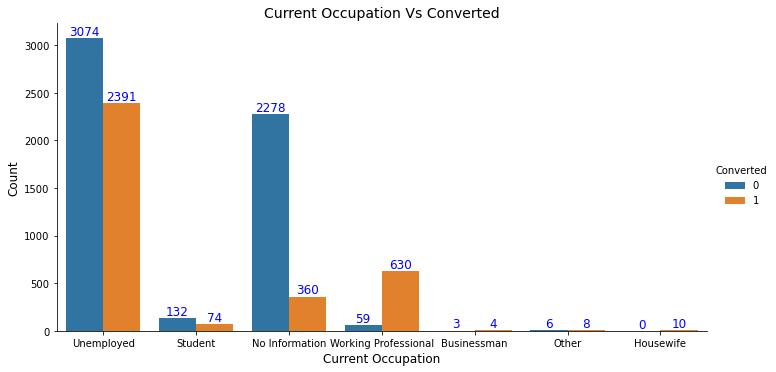

In [55]:
# What is your current occupation

plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=leaddf, 
                   aspect = 2.0);

plt.title('Current Occupation Vs Converted', fontsize = 14)
plt.xlabel("Current Occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

More conversion happend with people who are unemployed. It can also be noticed from the above data that

- Out of 7 business men, 4 got converted
- Out 10 housewives, all 10 leads got converted.

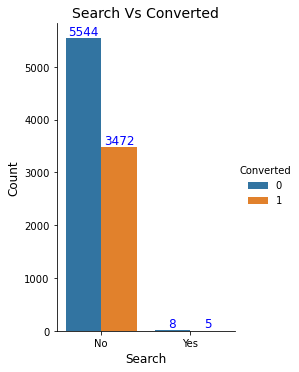

In [56]:
# Search

plot = sns.catplot(x="Search", hue = "Converted", kind="count", data=leaddf, aspect = 0.7);

plt.title('Search Vs Converted', fontsize = 14)
plt.xlabel("Search", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Conversion rate is high on leads who are not through search

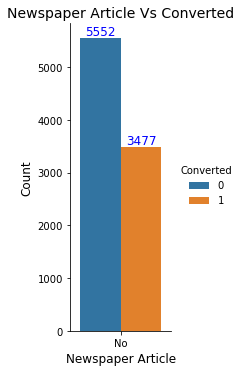

In [57]:
# Newspaper Article

plot = sns.catplot(x="Newspaper Article", hue = "Converted", kind="count", data=leaddf, aspect = 0.5);

plt.title('Newspaper Article Vs Converted', fontsize = 14)
plt.xlabel("Newspaper Article", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Since "Newspaper Article" column now has only one value for all rows - "No" , it is safe to drop this column

In [58]:
# Dropping Newspaper Article

leaddf = leaddf.drop(['Newspaper Article'], axis=1)

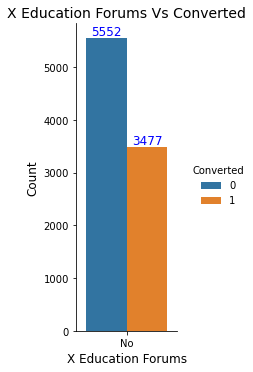

In [59]:
# X Education Forums

plot = sns.catplot(x="X Education Forums", hue = "Converted", kind="count", data=leaddf, aspect = 0.5);

plt.title('X Education Forums Vs Converted', fontsize = 14)
plt.xlabel("X Education Forums", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Since "X Education Forums" column now has only one value for all rows - "No" , it is safe to drop this column

In [60]:
# Dropping X Education Forum column

leaddf = leaddf.drop(['X Education Forums'], axis=1)

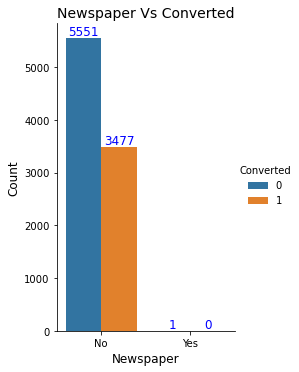

In [61]:
plot = sns.catplot(x="Newspaper", hue = "Converted", kind="count", data=leaddf, aspect = 0.7);

plt.title('Newspaper Vs Converted', fontsize = 14)
plt.xlabel("Newspaper", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Since Newspaper column has only one row with "Yes" as the value and further since this lead did not get converted and rest of all the values are "No", we can safely drop the column

In [62]:
# Dropping Newspaper column

leaddf = leaddf.drop(['Newspaper'], axis=1)

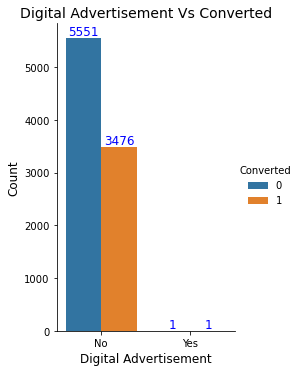

In [63]:
# Digital Advertisement

plot = sns.catplot(x="Digital Advertisement", hue = "Converted", kind="count", data=leaddf, aspect = 0.7);

plt.title('Digital Advertisement Vs Converted', fontsize = 14)
plt.xlabel("Digital Advertisement", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

It can be noticed above that there were 2 leads that came from digital advertisement of which one lead got converted

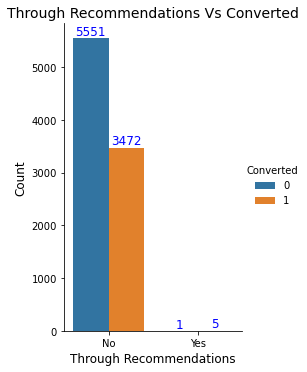

In [64]:
# Through Recommendations

plot = sns.catplot(x="Through Recommendations", hue = "Converted", kind="count", data=leaddf, aspect = 0.7);

plt.title('Through Recommendations Vs Converted', fontsize = 14)
plt.xlabel("Through Recommendations", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

It can be seen that a total of 6 leads came through recommendations of which 5 leads got converted

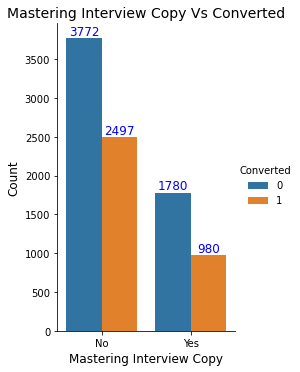

In [65]:
# A free copy of Mastering The Interview

plot = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted", kind="count", data=leaddf,
                   aspect = 0.7);

plt.title('Mastering Interview Copy Vs Converted', fontsize = 14)
plt.xlabel("Mastering Interview Copy", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Conversion rate is high on leads who do not want a free copy of Mastering Interviews

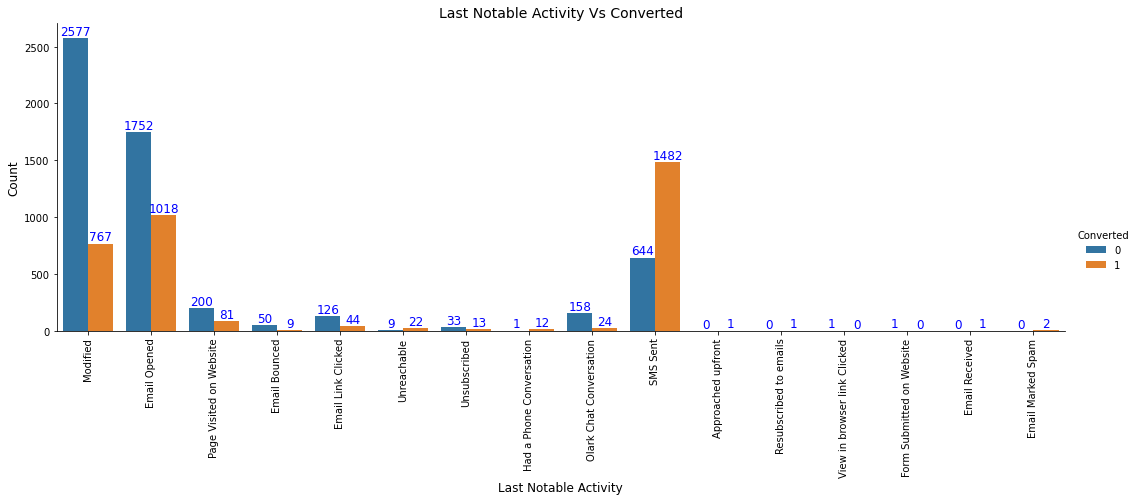

In [66]:
# Last Notable Activity

plot = sns.catplot(x="Last Notable Activity", hue = "Converted", kind="count", data=leaddf, aspect = 3.0);

plt.title('Last Notable Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Notable Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

It can be noticed that the conversion rate is high for "SMS Sent"

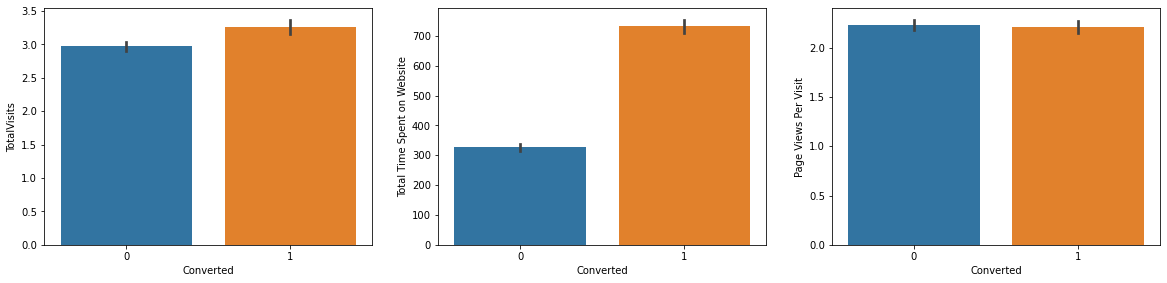

In [67]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', data = leaddf)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', data = leaddf)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', data = leaddf)
plt.show()

The conversion rated were high for Total Visits, Total Time Spent on Website and Page Views Per Visit

#### Data Preparation - Creating Dummies

Converting some binary variables (Yes/No) to 0/1

In [68]:
variablelist =  ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations', 
                                 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
leaddf[variablelist] = leaddf[variablelist].apply(binary_map)

In [69]:

# Creating dummies for the following columns below

# Lead Origin : 

d_lead_origin = pd.get_dummies(leaddf['Lead Origin'], prefix='LeadOrigin')
# Dropping quick Add Form column
d_lead_origin1 = d_lead_origin.drop(['LeadOrigin_Quick Add Form'], 1)
#Adding the results to the master dataframe
leaddf = pd.concat([leaddf, d_lead_origin1], axis = 1)

# Lead Source :

d_lead_source = pd.get_dummies(leaddf['Lead Source'], prefix='LeadSource')
# Dropping blog column
d_lead_source1 = d_lead_source.drop(['LeadSource_NC_EDM'], 1)
# Adding the results to the master dataframe
leaddf = pd.concat([leaddf,d_lead_source1], axis=1)

# last Activity

d_last_activity = pd.get_dummies(leaddf['Last Activity'], prefix='LastActivity')
# Dropping Resubscribed to emails column
d_last_activity1 = d_last_activity.drop(['LastActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
leaddf = pd.concat([leaddf,d_last_activity1], axis=1)

# What is your current occupation

d_curr_occupation = pd.get_dummies(leaddf['What is your current occupation'], prefix='CurrentOccupation')
# Dropping No Information column
d_curr_occupation1 = d_curr_occupation.drop(['CurrentOccupation_Businessman'], 1)
# Adding the results to the master dataframe
leaddf = pd.concat([leaddf,d_curr_occupation1], axis=1)

# Last Notable Activity

d_last_notable_activity = pd.get_dummies(leaddf['Last Notable Activity'], prefix='LastNotableActivity')
# Dropping Resubscribed to emails column
d_last_notable_activity1 = d_last_notable_activity.drop(['LastNotableActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
leaddf = pd.concat([leaddf,d_last_notable_activity1], axis=1)

leaddf.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,1,0,0,0,0,0,0


In [70]:
# Remove following columns from the leadInfo

# a) Prospect ID
# b) Lead Numbers
# c) Lead Origin
# d) Lead Source
# e) Last Activity
# f) What is your current occupation
# g) Last Notable Activity

leaddf = leaddf.drop(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Last Activity',
                          'What is your current occupation', 'Last Notable Activity'], axis=1)

In [71]:
leaddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 71 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      9029 non-null   int64  
 1   Do Not Call                                       9029 non-null   int64  
 2   Converted                                         9029 non-null   int64  
 3   TotalVisits                                       9029 non-null   float64
 4   Total Time Spent on Website                       9029 non-null   int64  
 5   Page Views Per Visit                              9029 non-null   float64
 6   Search                                            9029 non-null   int64  
 7   Digital Advertisement                             9029 non-null   int64  
 8   Through Recommendations                           9029 non-null   int64  
 9   A free copy of Mast

In [72]:
# check for percentage of null values in each column

percent_missing = round(100*(leaddf.isnull().sum()/len(leaddf.index)), 2)
print(percent_missing)

Do Not Email                                        0.0
Do Not Call                                         0.0
Converted                                           0.0
TotalVisits                                         0.0
Total Time Spent on Website                         0.0
                                                   ... 
LastNotableActivity_Page Visited on Website         0.0
LastNotableActivity_SMS Sent                        0.0
LastNotableActivity_Unreachable                     0.0
LastNotableActivity_Unsubscribed                    0.0
LastNotableActivity_View in browser link Clicked    0.0
Length: 71, dtype: float64


In [73]:
# check shape of the data frame

leaddf.shape

(9029, 71)

Since there are around 71 columns, we will not be looking at the correlation using heat map as we will not be able to infer anything from the heat map due to huge data

#### Test-Train Split

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
# Putting feature variable to X

X = leaddf.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [76]:
# Putting response variable to y

y = leaddf['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [77]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

#### Rescaling the features with MinMax Scaling

In [78]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
2240,0,0,0.1875,0.898963,0.375,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0,0,0.3125,0.706360,0.625,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4132,0,0,0.3750,0.768155,0.750,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5573,0,0,0.1250,0.028868,0.250,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1109,0,0,0.0625,0.009021,0.125,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [79]:
### Checking the Conversion Rate percentage

converted = (sum(leaddf['Converted'])/len(leaddf['Converted'].index))*100
converted

38.50924797873519

We have almost 39% conversion rate

#### Model Building

Assessing the model with StatsModels

Running the Initial Training Model

In [80]:
import statsmodels.api as sm

In [81]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6259
Model Family:                Binomial   Df Model:                           60
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 03 Jun 2022   Deviance:                   1.7170e+05
Time:                        06:01:45   Pearson chi2:                 8.39e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             1.797e+15    6.4e+07   2.81e+07      0.000     1.8e+15     1.8e+15
Do Not Email                                     -4.397e+14   4.48e+06  -9.82e+07      0.000    -4.4e+14    -4.4e+14
Do Not Call                                       4.493e+15   4.76e+07   9.44e+07      0.000    4.49e+15    4.49e+15
TotalVisits                                      -2.924e+14   7.63e+06  -3.83e+07      0.000   -2.92e+14   -2.92e+14
Total Time Spent on Website                       1.435e+15      4e+06   3.58e+08      0.000    1.43e+15    1.43e+15
Page Views Per Visit                             -1.319e+15   6.47e+06  -2.04e+08      0.000   -1.32e+15   -1.32e+15
Search                                           -7.248e+14   2.44e+07  -2.97e+07      0.000   -7.25e+14   -7.25e+14
Digital Advertisement                            -1.064e+15   4.76e+07  -2.24e+07      0.000   -1.06e+15   -1.06e+15
Through Recommendations                           6.798e+14    4.2e+07   1.62e+07      0.000     6.8e+14     6.8e+14
A free copy of Mastering The Interview            3.619e+13   2.69e+06   1.35e+07      0.000    3.62e+13    3.62e+13
LeadOrigin_API                                   -3.209e+15   6.74e+07  -4.76e+07      0.000   -3.21e+15   -3.21e+15
LeadOrigin_Landing Page Submission               -3.532e+15   6.74e+07  -5.24e+07      0.000   -3.53e+15   -3.53e+15
LeadOrigin_Lead Add Form                         -3.596e+15   6.86e+07  -5.24e+07      0.000    -3.6e+15    -3.6e+15
LeadOrigin_Lead Import                           -3.485e+15   8.27e+07  -4.21e+07      0.000   -3.49e+15   -3.49e+15
LeadSource_Click2call                             4.743e+15   4.69e+07   1.01e+08      0.000    4.74e+15    4.74e+15
LeadSource_Direct Traffic                         1.334e+15   1.17e+07   1.14e+08      0.000    1.33e+15    1.33e+15
LeadSource_Facebook                               5.949e+14   4.62e+07   1.29e+07      0.000    5.95e+14    5.95e+14
LeadSource_Google                                 1.286e+15   1.15e+07   1.12e+08      0.000    1.29e+15    1.29e+15
LeadSource_Live Chat                              3.381e+15   4.67e+07   7.23e+07      0.000    3.38e+15    3.38e+15
LeadSource_Olark Chat                             1.415e+15   1.18e+07    1.2e+08      0.000    1.41e+15    1.41e+15
LeadSource_Organic Search                         1.589e+15   1.18e+07   1.35e+08      0.000    1.59e+15    1.59e+15
LeadSource_Pay per Click Ads                        16.9161   5.42e-07   3.12e+07      0.000      16.916      16.916
LeadSource_Press_Release                             3.6535   2.25e-07   1.63e+07      0.000       3.653       3.653
LeadSource_Reference                     

 #### Feature Selection Using RFE

In [82]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [84]:
from sklearn.feature_selection import RFE

# running RFE with 20 variables as output

rfe = RFE(logreg,step=20)            
rfe = rfe.fit(X_train, y_train)

In [86]:
rfe.support_

array([ True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True, False, False,  True,  True, False, False,
        True,  True, False, False, False,  True, False, False,  True,
        True, False, False, False, False,  True,  True,  True, False,
       False,  True, False, False,  True,  True,  True, False,  True,
       False, False, False, False,  True,  True, False,  True,  True,
        True, False, False,  True, False,  True, False, False,  True,
        True,  True, False, False,  True, False, False])

In [87]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', True, 1),
 ('Digital Advertisement', False, 3),
 ('Through Recommendations', False, 2),
 ('A free copy of Mastering The Interview', False, 3),
 ('LeadOrigin_API', True, 1),
 ('LeadOrigin_Landing Page Submission', True, 1),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 2),
 ('LeadSource_Click2call', False, 3),
 ('LeadSource_Direct Traffic', True, 1),
 ('LeadSource_Facebook', True, 1),
 ('LeadSource_Google', False, 2),
 ('LeadSource_Live Chat', False, 3),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', True, 1),
 ('LeadSource_Pay per Click Ads', False, 3),
 ('LeadSource_Press_Release', False, 3),
 ('LeadSource_Reference', False, 2),
 ('LeadSource_Referral Sites', True, 1),
 ('LeadSource_Social Media', False, 3),
 ('LeadSource_WeLearn', False, 3),
 ('LeadSource_Welingak 

In [88]:
# variables shortlisted by RFE

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'LeadOrigin_API', 'LeadOrigin_Landing Page Submission',
       'LeadOrigin_Lead Add Form', 'LeadSource_Direct Traffic',
       'LeadSource_Facebook', 'LeadSource_Olark Chat',
       'LeadSource_Organic Search', 'LeadSource_Referral Sites',
       'LeadSource_Welingak Website', 'LeadSource_bing',
       'LastActivity_Approached upfront', 'LastActivity_Converted to Lead',
       'LastActivity_Email Bounced', 'LastActivity_Email Opened',
       'LastActivity_Had a Phone Conversation', 'LastActivity_Not Sure',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_Housewife', 'CurrentOccupation_No Information',
       'CurrentOccupation_Student', 'CurrentOccupation_Unemployed',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Email Link Clicked',
       'LastNotableActivity_Email Opened',
 

#### Rebuilding Model - Model 2

In [89]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6284
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2476.7
Date:                Fri, 03 Jun 2022   Deviance:                       4953.3
Time:                        06:05:11   Pearson chi2:                 6.57e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4250
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.0226      1.477     -0.015      0.988      -2.917       2.871
Do Not Email                                    -1.0209      0.199     -5.123      0.000      -1.412      -0.630
Do Not Call                                     22.9525    5.3e+04      0.000      1.000   -1.04e+05    1.04e+05
TotalVisits                                      1.6653      0.297      5.603      0.000       1.083       2.248
Total Time Spent on Website                      4.5003      0.171     26.385      0.000       4.166       4.835
Page Views Per Visit                            -0.7845      0.262     -2.997      0.003      -1.298      -0.272
Search                                          -1.4841      1.009     -1.472      0.141      -3.461       0.493
LeadOrigin_API                                  -1.4232      1.350     -1.054      0.292      -4.069       1.223
LeadOrigin_Landing Page Submission              -1.5434      1.350     -1.144      0.253      -4.189       1.102
LeadOrigin_Lead Add Form                         1.9714      1.359      1.451      0.147      -0.692       4.635
LeadSource_Direct Traffic                       -0.4193      0.099     -4.224      0.000      -0.614      -0.225
LeadSource_Facebook                             -1.2978      1.372     -0.946      0.344      -3.987       1.391
LeadSource_Olark Chat                            1.1929      0.150      7.966      0.000       0.899       1.486
LeadSource_Organic Search                       -0.1786      0.120     -1.484      0.138      -0.414       0.057
LeadSource_Referral Sites                       -0.3056      0.341     -0.895      0.371      -0.974       0.363
LeadSource_Welingak Website                      2.1139      0.743      2.846      0.004       0.658       3.570
LeadSource_bing                                -21.1564   3.31e+04     -0.001      0.999   -6.48e+04    6.48e+04
LastActivity_Approached upfront                 23.9425   2.63e+04      0.001      0.999   -5.16e+04    5.16e+04
LastActivity_Converted to Lead                  -0.1085      0.251     -0.431      0.666      -0.601       0.384
LastActivity_Email Bounced                      -0.6055      0.394     -1.537      0.124      -1.378       0.167
LastActivity_Email Opened                        0.7997      0.188      4.253      0.000       0.431       1.168
LastActivity_Had a Phone Conversation            1.2004      0.945      1.270      0.204      -0.653       3.054
LastActivity_Not Sure                           -0.7442      0.483     -1.539      0.124      -1.692       0.203
LastActivity_Olark Chat Conversation            -0.6133      0.231     -2.651      0.008      -1.067      -0.160
LastActivity_SMS Sent           

Removing column LastActivity_Approached_Upfront as it has a high pvalue and hence is insignificant

In [90]:
col = col.drop(['LastActivity_Approached upfront'])

#### Rebuilding Model - Model 3

In [91]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6285
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2482.2
Date:                Fri, 03 Jun 2022   Deviance:                       4964.3
Time:                        06:05:11   Pearson chi2:                 6.57e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4240
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.0147      1.477     -0.010      0.992      -2.910       2.880
Do Not Email                                    -1.0315      0.199     -5.182      0.000      -1.422      -0.641
Do Not Call                                     22.9578   5.31e+04      0.000      1.000   -1.04e+05    1.04e+05
TotalVisits                                      1.6432      0.297      5.534      0.000       1.061       2.225
Total Time Spent on Website                      4.5068      0.170     26.443      0.000       4.173       4.841
Page Views Per Visit                            -0.7717      0.261     -2.951      0.003      -1.284      -0.259
Search                                          -1.4847      1.009     -1.472      0.141      -3.462       0.493
LeadOrigin_API                                  -1.4205      1.352     -1.051      0.293      -4.070       1.229
LeadOrigin_Landing Page Submission              -1.5397      1.351     -1.139      0.255      -4.188       1.109
LeadOrigin_Lead Add Form                         1.9807      1.361      1.456      0.145      -0.686       4.647
LeadSource_Direct Traffic                       -0.4161      0.099     -4.196      0.000      -0.610      -0.222
LeadSource_Facebook                             -1.2936      1.374     -0.942      0.346      -3.986       1.398
LeadSource_Olark Chat                            1.2104      0.150      8.090      0.000       0.917       1.504
LeadSource_Organic Search                       -0.1702      0.120     -1.417      0.157      -0.406       0.065
LeadSource_Referral Sites                       -0.3067      0.341     -0.899      0.369      -0.976       0.362
LeadSource_Welingak Website                      2.1105      0.743      2.841      0.004       0.654       3.566
LeadSource_bing                                -21.1562   3.31e+04     -0.001      0.999   -6.49e+04    6.48e+04
LastActivity_Converted to Lead                  -0.1610      0.250     -0.643      0.520      -0.652       0.330
LastActivity_Email Bounced                      -0.6428      0.394     -1.633      0.102      -1.414       0.128
LastActivity_Email Opened                        0.7456      0.186      3.998      0.000       0.380       1.111
LastActivity_Had a Phone Conversation            1.1443      0.945      1.211      0.226      -0.708       2.996
LastActivity_Not Sure                           -0.7981      0.483     -1.652      0.098      -1.745       0.149
LastActivity_Olark Chat Conversation            -0.6714      0.230     -2.919      0.004      -1.122      -0.221
LastActivity_SMS Sent                            1.4191      0.145      9.820      0.000       1.136       1.702
CurrentOccupation_Housewife     

Removing column CurrentOccupation_Housewife as it has a high pvalue and hence is insignificant

In [92]:
col = col.drop('CurrentOccupation_Housewife')

#### Rebuilding Model - Model 4

In [93]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6286
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2486.0
Date:                Fri, 03 Jun 2022   Deviance:                       4972.0
Time:                        06:05:12   Pearson chi2:                 6.57e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4233
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.7375      1.445      0.510      0.610      -2.095       3.570
Do Not Email                                    -1.0370      0.199     -5.207      0.000      -1.427      -0.647
Do Not Call                                     21.9648   3.22e+04      0.001      0.999   -6.31e+04    6.32e+04
TotalVisits                                      1.6203      0.297      5.462      0.000       1.039       2.202
Total Time Spent on Website                      4.4998      0.170     26.423      0.000       4.166       4.834
Page Views Per Visit                            -0.7888      0.261     -3.017      0.003      -1.301      -0.276
Search                                          -1.4754      1.006     -1.466      0.143      -3.448       0.497
LeadOrigin_API                                  -1.4201      1.350     -1.052      0.293      -4.065       1.225
LeadOrigin_Landing Page Submission              -1.5259      1.349     -1.131      0.258      -4.170       1.119
LeadOrigin_Lead Add Form                         1.9765      1.358      1.455      0.146      -0.686       4.639
LeadSource_Direct Traffic                       -0.4260      0.099     -4.301      0.000      -0.620      -0.232
LeadSource_Facebook                             -1.2957      1.371     -0.945      0.345      -3.984       1.392
LeadSource_Olark Chat                            1.2013      0.150      8.033      0.000       0.908       1.494
LeadSource_Organic Search                       -0.1630      0.120     -1.361      0.174      -0.398       0.072
LeadSource_Referral Sites                       -0.3009      0.341     -0.882      0.378      -0.970       0.368
LeadSource_Welingak Website                      2.1097      0.743      2.840      0.005       0.654       3.566
LeadSource_bing                                -20.1607   2.01e+04     -0.001      0.999   -3.93e+04    3.93e+04
LastActivity_Converted to Lead                  -0.1613      0.250     -0.645      0.519      -0.652       0.329
LastActivity_Email Bounced                      -0.6356      0.393     -1.616      0.106      -1.407       0.135
LastActivity_Email Opened                        0.7548      0.186      4.057      0.000       0.390       1.119
LastActivity_Had a Phone Conversation            1.1425      0.944      1.210      0.226      -0.708       2.993
LastActivity_Not Sure                           -0.7971      0.482     -1.654      0.098      -1.741       0.147
LastActivity_Olark Chat Conversation            -0.6749      0.230     -2.933      0.003      -1.126      -0.224
LastActivity_SMS Sent                            1.4220      0.144      9.845      0.000       1.139       1.705
CurrentOccupation_No Information

Removing column LastActivity_Had a Phone Conversation as it has high pvalue and hence is insignificant

In [94]:
col = col.drop(['LastActivity_Had a Phone Conversation'])

In [104]:
col.unique()

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'LeadOrigin_API', 'LeadOrigin_Landing Page Submission',
       'LeadOrigin_Lead Add Form', 'LeadSource_Direct Traffic',
       'LeadSource_Facebook', 'LeadSource_Olark Chat',
       'LeadSource_Organic Search', 'LeadSource_Referral Sites',
       'LeadSource_Welingak Website', 'LeadSource_bing',
       'LastActivity_Converted to Lead', 'LastActivity_Email Bounced',
       'LastActivity_Email Opened', 'LastActivity_Not Sure',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_No Information', 'CurrentOccupation_Student',
       'CurrentOccupation_Unemployed',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Email Link Clicked',
       'LastNotableActivity_Email Opened',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified',
       'LastNotableAc

#### Rebuilding Model - Model 5

In [95]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6287
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2486.7
Date:                Fri, 03 Jun 2022   Deviance:                       4973.5
Time:                        06:05:12   Pearson chi2:                 6.30e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4231
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.7419      1.445      0.513      0.608      -2.090       3.574
Do Not Email                                    -1.0420      0.199     -5.234      0.000      -1.432      -0.652
Do Not Call                                     21.9611   3.22e+04      0.001      0.999   -6.32e+04    6.32e+04
TotalVisits                                      1.6078      0.296      5.425      0.000       1.027       2.189
Total Time Spent on Website                      4.5017      0.170     26.439      0.000       4.168       4.835
Page Views Per Visit                            -0.7906      0.261     -3.024      0.002      -1.303      -0.278
Search                                          -1.4739      1.006     -1.465      0.143      -3.445       0.498
LeadOrigin_API                                  -1.4176      1.350     -1.050      0.294      -4.063       1.228
LeadOrigin_Landing Page Submission              -1.5225      1.349     -1.128      0.259      -4.167       1.122
LeadOrigin_Lead Add Form                         1.9849      1.359      1.461      0.144      -0.678       4.648
LeadSource_Direct Traffic                       -0.4248      0.099     -4.289      0.000      -0.619      -0.231
LeadSource_Facebook                             -1.2942      1.372     -0.943      0.345      -3.983       1.394
LeadSource_Olark Chat                            1.2003      0.150      8.027      0.000       0.907       1.493
LeadSource_Organic Search                       -0.1555      0.120     -1.299      0.194      -0.390       0.079
LeadSource_Referral Sites                       -0.2758      0.338     -0.816      0.415      -0.938       0.387
LeadSource_Welingak Website                      2.1030      0.743      2.831      0.005       0.647       3.559
LeadSource_bing                                -20.1614   2.01e+04     -0.001      0.999   -3.93e+04    3.93e+04
LastActivity_Converted to Lead                  -0.1867      0.249     -0.750      0.453      -0.675       0.302
LastActivity_Email Bounced                      -0.6527      0.393     -1.660      0.097      -1.423       0.118
LastActivity_Email Opened                        0.7320      0.185      3.961      0.000       0.370       1.094
LastActivity_Not Sure                           -0.8222      0.481     -1.708      0.088      -1.766       0.122
LastActivity_Olark Chat Conversation            -0.6968      0.229     -3.041      0.002      -1.146      -0.248
LastActivity_SMS Sent                            1.4064      0.144      9.794      0.000       1.125       1.688
CurrentOccupation_No Information                -2.4442      0.506     -4.834      0.000      -3.435      -1.453
CurrentOccupation_Student       

Removing column LeadSource_Reference as it has high pvalue and hence is insignificant

In [106]:
col = col.drop('LeadSource_Referral Sites')

#### Rebuilding Model - Model 6

In [107]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6288
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2487.1
Date:                Fri, 03 Jun 2022   Deviance:                       4974.2
Time:                        06:16:21   Pearson chi2:                 6.31e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4231
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.7421      1.445      0.514      0.608      -2.090       3.574
Do Not Email                                    -1.0418      0.199     -5.235      0.000      -1.432      -0.652
Do Not Call                                     21.9684   3.23e+04      0.001      0.999   -6.33e+04    6.33e+04
TotalVisits                                      1.5998      0.296      5.403      0.000       1.020       2.180
Total Time Spent on Website                      4.5045      0.170     26.454      0.000       4.171       4.838
Page Views Per Visit                            -0.7984      0.261     -3.057      0.002      -1.310      -0.286
Search                                          -1.4712      1.005     -1.463      0.143      -3.442       0.499
LeadOrigin_API                                  -1.4302      1.350     -1.060      0.289      -4.075       1.215
LeadOrigin_Landing Page Submission              -1.5231      1.349     -1.129      0.259      -4.168       1.121
LeadOrigin_Lead Add Form                         1.9846      1.359      1.461      0.144      -0.678       4.647
LeadSource_Direct Traffic                       -0.4200      0.099     -4.247      0.000      -0.614      -0.226
LeadSource_Facebook                             -1.2945      1.372     -0.944      0.345      -3.983       1.394
LeadSource_Olark Chat                            1.2130      0.149      8.154      0.000       0.921       1.505
LeadSource_Organic Search                       -0.1445      0.119     -1.214      0.225      -0.378       0.089
LeadSource_Welingak Website                      2.1031      0.743      2.831      0.005       0.647       3.559
LeadSource_bing                                -20.1488      2e+04     -0.001      0.999   -3.93e+04    3.93e+04
LastActivity_Converted to Lead                  -0.1872      0.249     -0.751      0.453      -0.676       0.301
LastActivity_Email Bounced                      -0.6527      0.393     -1.661      0.097      -1.423       0.118
LastActivity_Email Opened                        0.7334      0.185      3.970      0.000       0.371       1.096
LastActivity_Not Sure                           -0.8166      0.481     -1.696      0.090      -1.760       0.127
LastActivity_Olark Chat Conversation            -0.6949      0.229     -3.032      0.002      -1.144      -0.246
LastActivity_SMS Sent                            1.4128      0.143      9.851      0.000       1.132       1.694
CurrentOccupation_No Information                -2.4497      0.505     -4.846      0.000      -3.440      -1.459
CurrentOccupation_Student                       -1.2837      0.547     -2.349      0.019      -2.355      -0.212
CurrentOccupation_Unemployed    

Removing column Search as it has high pvalue and hence is insignificant

In [108]:
col = col.drop('Search')

#### Model 7

In [109]:
X_train_sm

,const,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,...,CurrentOccupation_No Information,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Opened,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Unreachable
2240,1.0,0,0,0.1875,0.898963,0.375,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
113,1.0,0,0,0.3125,0.706360,0.625,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4132,1.0,0,0,0.3750,0.768155,0.750,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
5573,1.0,0,0,0.1250,0.028868,0.250,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
1109,1.0,0,0,0.0625,0.009021,0.125,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5854,1.0,0,0,0.3125,0.111412,0.625,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
5292,1.0,0,0,0.0000,0.000000,0.000,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5496,1.0,0,0,0.1250,0.065404,0.250,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
885,1.0,1,0,0.5000,0.039693,1.000,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [110]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6289
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2488.3
Date:                Fri, 03 Jun 2022   Deviance:                       4976.5
Time:                        06:16:26   Pearson chi2:                 6.30e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4229
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.7548      1.444      0.523      0.601      -2.076       3.585
Do Not Email                                    -1.0405      0.199     -5.229      0.000      -1.430      -0.651
Do Not Call                                     21.9700   3.23e+04      0.001      0.999   -6.33e+04    6.33e+04
TotalVisits                                      1.5728      0.296      5.320      0.000       0.993       2.152
Total Time Spent on Website                      4.5006      0.170     26.444      0.000       4.167       4.834
Page Views Per Visit                            -0.8060      0.261     -3.087      0.002      -1.318      -0.294
LeadOrigin_API                                  -1.4252      1.349     -1.057      0.291      -4.069       1.219
LeadOrigin_Landing Page Submission              -1.5170      1.349     -1.125      0.261      -4.160       1.126
LeadOrigin_Lead Add Form                         1.9802      1.358      1.458      0.145      -0.681       4.642
LeadSource_Direct Traffic                       -0.4237      0.099     -4.286      0.000      -0.617      -0.230
LeadSource_Facebook                             -1.2969      1.371     -0.946      0.344      -3.984       1.390
LeadSource_Olark Chat                            1.2022      0.149      8.089      0.000       0.911       1.493
LeadSource_Organic Search                       -0.1515      0.119     -1.274      0.203      -0.384       0.082
LeadSource_Welingak Website                      2.1026      0.743      2.830      0.005       0.647       3.559
LeadSource_bing                                -20.1525   2.01e+04     -0.001      0.999   -3.93e+04    3.93e+04
LastActivity_Converted to Lead                  -0.1923      0.249     -0.772      0.440      -0.681       0.296
LastActivity_Email Bounced                      -0.6557      0.393     -1.669      0.095      -1.426       0.114
LastActivity_Email Opened                        0.7309      0.185      3.958      0.000       0.369       1.093
LastActivity_Not Sure                           -0.8132      0.481     -1.689      0.091      -1.757       0.130
LastActivity_Olark Chat Conversation            -0.6976      0.229     -3.045      0.002      -1.147      -0.249
LastActivity_SMS Sent                            1.4093      0.143      9.833      0.000       1.128       1.690
CurrentOccupation_No Information                -2.4509      0.505     -4.849      0.000      -3.442      -1.460
CurrentOccupation_Student                       -1.2850      0.547     -2.351      0.019      -2.356      -0.214
CurrentOccupation_Unemployed                    -1.2172      0.501     -2.432      0.015      -2.198      -0.236
CurrentOccupation_Working Profes

Since the Model 7 seems to be stable with significant pvalues, we shall go ahead with this model for further analysis

In [111]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2240    0.714341
113     0.455274
4132    0.716625
5573    0.100929
1109    0.016016
2282    0.056149
2976    0.737962
8431    0.414261
2770    0.803156
5790    0.996265
dtype: float64

In [112]:
# Reshape

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.71434139, 0.45527441, 0.7166248 , 0.10092944, 0.01601575,
       0.05614864, 0.73796193, 0.41426084, 0.80315611, 0.99626494])

#### Creating a dataframe with the actual converted flag and the predicted probabilities

In [113]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.714341,2240
1,0,0.455274,113
2,1,0.716625,4132
3,0,0.100929,5573
4,0,0.016016,1109


#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [114]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.714341,2240,1
1,0,0.455274,113,0
2,1,0.716625,4132,1
3,0,0.100929,5573,0
4,0,0.016016,1109,0


#### Lets check the confusion metrics and accuracy

In [115]:
from sklearn import metrics

In [116]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3415  443]
 [ 692 1770]]


In [117]:
# Predicted     not_converted    converted
# Actual
# not_converted        3412      446
# converted            712      1750

In [118]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8204113924050633


Accuracy rate is around 81% which is good. However we will also need to calculate the other metrics as we cannot depend only on the accuracy metrics

#### Checking VIFs

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,CurrentOccupation_Unemployed,144.43
6,LeadOrigin_Landing Page Submission,134.79
5,LeadOrigin_API,101.63
20,CurrentOccupation_No Information,70.00
7,LeadOrigin_Lead Add Form,21.54
23,CurrentOccupation_Working Professional,18.45
16,LastActivity_Email Opened,10.15
25,LastNotableActivity_Email Opened,9.66
4,Page Views Per Visit,7.44
21,CurrentOccupation_Student,6.57


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

#### Metrics - Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [120]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [121]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.718927701056052

In [122]:
# Let us calculate specificity

TN / float(TN+FP)

0.8851736651114567

In [123]:
# Calculate false postive rate - predicting non conversion when leads have converted

print(FP/ float(TN+FP))

0.11482633488854328


In [124]:
# positive predictive value 

print (TP / float(TP+FP))

0.7998192498870311


In [125]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8315071828585342


####  Plotting the ROC Curve

In [126]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [127]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

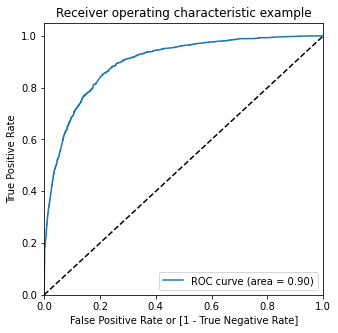

In [128]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Finding Optimal Cutoff Point

Optimal cut off probability is that prob where we get balanced sensitivity and specificity

In [129]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.714341,2240,1,1,1,1,1,1,1,1,1,0,0
1,0,0.455274,113,0,1,1,1,1,1,0,0,0,0,0
2,1,0.716625,4132,1,1,1,1,1,1,1,1,1,0,0
3,0,0.100929,5573,0,1,1,0,0,0,0,0,0,0,0
4,0,0.016016,1109,0,1,0,0,0,0,0,0,0,0,0


In [130]:

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.389557  1.000000  0.000000
0.1   0.1  0.655380  0.970755  0.454121
0.2   0.2  0.768196  0.923639  0.668999
0.3   0.3  0.804747  0.882210  0.755314
0.4   0.4  0.816614  0.785540  0.836444
0.5   0.5  0.820411  0.718928  0.885174
0.6   0.6  0.811551  0.645816  0.917315
0.7   0.7  0.787658  0.539399  0.946086
0.8   0.8  0.768196  0.456133  0.967341
0.9   0.9  0.720886  0.302600  0.987818


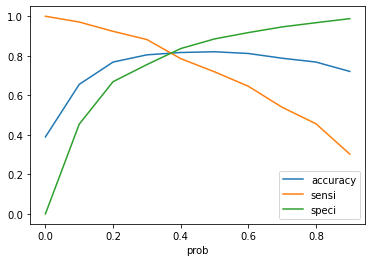

In [131]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [132]:
# Let us make the final prediction using 0.37 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.714341,2240,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.455274,113,0,1,1,1,1,1,0,0,0,0,0,1
2,1,0.716625,4132,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.100929,5573,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.016016,1109,0,1,0,0,0,0,0,0,0,0,0,0


In [133]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.714341,2240,1,1,1,1,1,1,1,1,1,0,0,1,71
1,0,0.455274,113,0,1,1,1,1,1,0,0,0,0,0,1,46
2,1,0.716625,4132,1,1,1,1,1,1,1,1,1,0,0,1,72
3,0,0.100929,5573,0,1,1,0,0,0,0,0,0,0,0,0,10
4,0,0.016016,1109,0,1,0,0,0,0,0,0,0,0,0,0,2
5,0,0.056149,2282,0,1,0,0,0,0,0,0,0,0,0,0,6
6,1,0.737962,2976,1,1,1,1,1,1,1,1,1,0,0,1,74
7,0,0.414261,8431,0,1,1,1,1,1,0,0,0,0,0,1,41
8,1,0.803156,2770,1,1,1,1,1,1,1,1,1,1,0,1,80
9,1,0.996265,5790,1,1,1,1,1,1,1,1,1,1,1,1,100


In [134]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    2001
0     461
Name: final_predicted, dtype: int64

In [135]:
# check the precentage of final_predicted conversions

1971/float(1971+491)

0.8005686433793664

Hence we can see that the final prediction of conversions have a target of 83% (83.1%) conversion as per the X Educations CEO's requirement . Hence this is a good model.

Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on train set

In [136]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8177215189873418

In [137]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3167,  691],
       [ 461, 2001]], dtype=int64)

In [138]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [139]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8127538586515028

In [140]:
# Let us calculate specificity

TN / float(TN+FP)

0.8208916537065837

In [141]:
# Calculate false postive rate - predicting conversions when leads has not converted

print(FP/ float(TN+FP))

0.17910834629341627


In [142]:
# Positive predictive value 

print (TP / float(TP+FP))

0.7433135215453195


In [143]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8729327453142227


#### Metrics - Precision and Recall

In [144]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3415,  443],
       [ 692, 1770]], dtype=int64)

In [145]:
from sklearn.metrics import precision_score, recall_score

In [146]:
# precision

precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7998192498870311

In [147]:
# recall

recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.718927701056052

#### Precision and recall tradeoff

In [148]:
from sklearn.metrics import precision_recall_curve

In [149]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 6315    1
 6316    1
 6317    0
 6318    0
 6319    0
 Name: Converted, Length: 6320, dtype: int64,
 0       1
 1       0
 2       1
 3       0
 4       0
        ..
 6315    0
 6316    1
 6317    0
 6318    0
 6319    0
 Name: predicted, Length: 6320, dtype: int64)

In [150]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

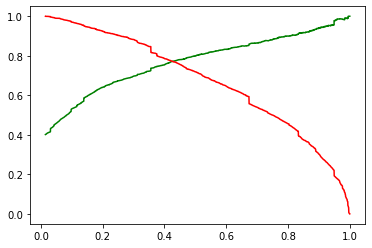

In [151]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Making predictions on the test set

In [152]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [153]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Direct Traffic,LeadSource_Facebook,...,CurrentOccupation_No Information,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Opened,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Unreachable
2296,0,0,0.1875,0.665313,0.37500,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8697,0,0,0.4375,0.184032,0.21875,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
7378,0,0,0.1250,0.163284,0.25000,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
8631,0,0,0.3125,0.407307,0.62500,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4799,0,0,0.5000,0.744700,1.00000,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [154]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [155]:
y_test_pred = res.predict(X_test_sm)

In [156]:
X_test.shape

(2709, 30)

In [157]:
X_test_sm.shape

(2709, 31)

In [158]:
X_train_sm.shape

(6320, 31)

In [159]:
X_test_sm.columns

Index(['const', 'Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'LeadOrigin_API',
       'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Add Form',
       'LeadSource_Direct Traffic', 'LeadSource_Facebook',
       'LeadSource_Olark Chat', 'LeadSource_Organic Search',
       'LeadSource_Welingak Website', 'LeadSource_bing',
       'LastActivity_Converted to Lead', 'LastActivity_Email Bounced',
       'LastActivity_Email Opened', 'LastActivity_Not Sure',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_No Information', 'CurrentOccupation_Student',
       'CurrentOccupation_Unemployed',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Email Link Clicked',
       'LastNotableActivity_Email Opened',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
    

In [160]:
X_train_sm.columns

Index(['const', 'Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'LeadOrigin_API',
       'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Add Form',
       'LeadSource_Direct Traffic', 'LeadSource_Facebook',
       'LeadSource_Olark Chat', 'LeadSource_Organic Search',
       'LeadSource_Welingak Website', 'LeadSource_bing',
       'LastActivity_Converted to Lead', 'LastActivity_Email Bounced',
       'LastActivity_Email Opened', 'LastActivity_Not Sure',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_No Information', 'CurrentOccupation_Student',
       'CurrentOccupation_Unemployed',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Email Link Clicked',
       'LastNotableActivity_Email Opened',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
    

In [161]:
y_test_pred[:10]

2296    0.918111
8697    0.585736
7378    0.170514
8631    0.586276
4799    0.937163
4503    0.375249
7129    0.865508
1717    0.138473
8398    0.856230
5116    0.310650
dtype: float64

In [162]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [163]:
# Let's see the head

y_pred_1.head()

,0
2296,0.918111
8697,0.585736
7378,0.170514
8631,0.586276
4799,0.937163


In [164]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [165]:
# Putting LeadId to index

y_test_df['LeadId'] = y_test_df.index

In [166]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [167]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [168]:
y_pred_final.head()

,Converted,LeadId,0
0,1,2296,0.918111
1,0,8697,0.585736
2,0,7378,0.170514
3,0,8631,0.586276
4,1,4799,0.937163


In [169]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [170]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['LeadId','Converted','Converted_Prob'], axis=1)

In [171]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob
0,2296,1,0.918111
1,8697,0,0.585736
2,7378,0,0.170514
3,8631,0,0.586276
4,4799,1,0.937163


In [172]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.37%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [173]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob,final_predicted
0,2296,1,0.918111,1
1,8697,0,0.585736,1
2,7378,0,0.170514,0
3,8631,0,0.586276,1
4,4799,1,0.937163,1


In [174]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,LeadId,Converted,Converted_Prob,final_predicted,lead_score
0,2296,1,0.918111,1,92
1,8697,0,0.585736,1,59
2,7378,0,0.170514,0,17
3,8631,0,0.586276,1,59
4,4799,1,0.937163,1,94
5,4503,0,0.375249,1,38
6,7129,0,0.865508,1,87
7,1717,0,0.138473,0,14
8,8398,0,0.856230,1,86
9,5116,1,0.310650,0,31


In [175]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    814
0    201
Name: final_predicted, dtype: int64

In [176]:
# check the precentage of final_predicted conversions on test data

812/float(812+203)

0.8

Hence we can see that the final prediction of conversions have a target rate of 80% (0.8)

##### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity on test set

In [177]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8172757475083057

In [178]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1400,  294],
       [ 201,  814]], dtype=int64)

In [179]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [180]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8019704433497536

In [181]:
# Let us calculate specificity
TN / float(TN+FP)

0.8264462809917356

#### Precision and Recall metrics for the test set

In [182]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7346570397111913
recall  0.8019704433497536


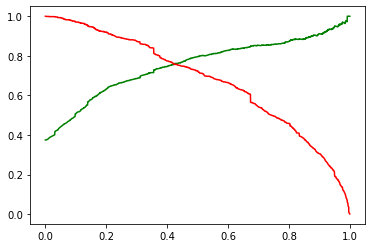

In [183]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Conclusion :

- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the
  optimal 
  cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 81%, 80% and 82% which are approximately closer to 
  the respective values calculated using trained set.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 
  around 80%
- Hence overall this model seems to be good.